<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
data= load_iris()
x=pd.DataFrame(data.data, columns=["sepal_length","sepal_width", "petal_length","petal_width"])
y=pd.DataFrame(data.target,columns=["variety"])
new_x=x[["sepal_length","petal_length"]]
df=pd.concat([new_x,y],axis=1)
subset=df.loc[(df['variety']==1)|(df['variety']==2)].reset_index(drop=True)
subset.head()

,sepal_length,petal_length,variety
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


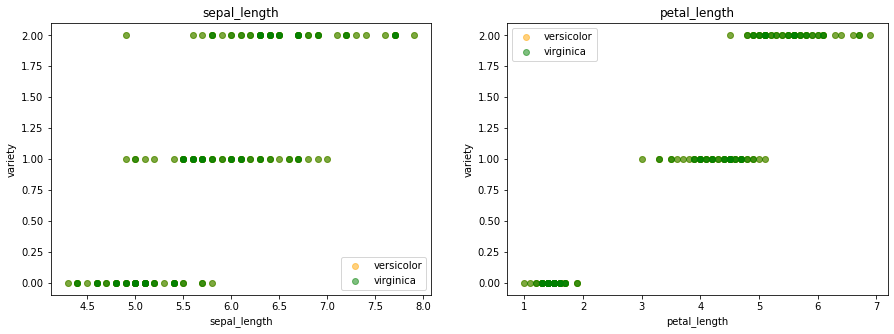

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(15,5))
variety_names=['versicolor','virginica']
x_features=['sepal_length','petal_length']
colors=['orange','green']
for x_feature in range(len(x_features)):
    for a in range(len(variety_names)):
        ax1=figure.add_subplot(1,2,x_feature +1)
        ax1.scatter(df[x_features[x_feature]],df['variety'],color=colors[a],label=variety_names[a], alpha=0.5)
    ax1.legend()
    ax1.set_title(x_features[x_feature])
    ax1.set_xlabel(x_features[x_feature])
    ax1.set_ylabel('variety')

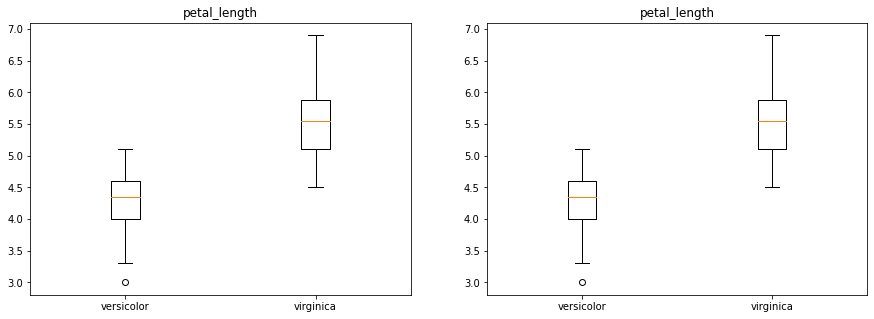

In [ ]:
fig=plt.figure(figsize=(15,5))
import seaborn as sns
for feature in range(len(x_features)):
    x=[]
    for i in range(len(variety_names)):
        target_variety=df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[x_feature]]))
    ax2=fig.add_subplot(1,2,feature+1)
    ax2.boxplot(x)
    ax2.set_xticks([1,2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[x_feature])

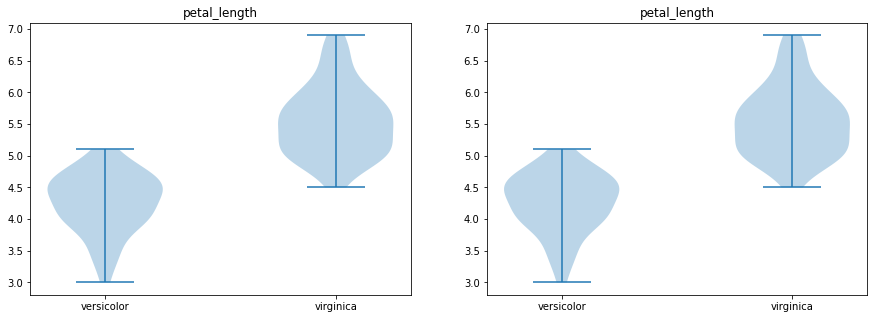

In [ ]:
fig=plt.figure(figsize=(15,5))
import seaborn as sns
for feature in range(len(x_features)):
    x=[]
    for i in range(len(variety_names)):
        target_variety=df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[x_feature]]))
    ax2=fig.add_subplot(1,2,feature+1)
    ax2.violinplot(x)
    ax2.set_xticks([1,2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[x_feature])

In [ ]:
# from scipy.sparse.construct import random
# import numpy as np
from sklearn.model_selection import train_test_split
x=np.array(subset.loc[:,["sepal_length","petal_length"]])
y=np.array(subset["variety"])
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
Scalar.fit(x_train)
x_train_trans=Scalar.transform(x_train)
x_test_trans=Scalar.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_neigh_3=KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(x_train_trans,y_train.ravel())
pred_3=k_neigh_3.predict(x_test_trans)
print("pred3=",pred_3)
k_neigh_5=KNeighborsClassifier(n_neighbors=5)
k_neigh_5.fit(x_train_trans,y_train.ravel())
pred_5=k_neigh_5.predict(x_test_trans)
print("pred5=",pred_5)
k_neigh_1=KNeighborsClassifier(n_neighbors=1)
k_neigh_1.fit(x_train_trans,y_train.ravel())
pred_1=k_neigh_1.predict(x_test_trans)
print("pred1=",pred_1)


pred3= [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
pred5= [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred1= [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predictions=[pred_3,pred_5,pred_1]
keys=["knn3","knn5","knn1"]
for a,prediction in enumerate(predictions,0):
    print("predictions of",keys[a])
    print("accuracy = ",accuracy_score(y_true=y_test,y_pred=prediction))
    print("precision = ",precision_score(y_true=y_test,y_pred=prediction,average=None))
    print("recall = ", recall_score(y_true=y_test,y_pred=prediction, average=None))
    print("f1 score =",f1_score(y_true=y_test,y_pred=prediction,average=None))
    print("confusion matrix = ",confusion_matrix(y_true=y_test,y_pred=prediction))
    print(".....................................................................")


predictions of knn3
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]
.....................................................................
predictions of knn5
accuracy =  0.8
precision =  [0.76470588 0.875     ]
recall =  [0.92857143 0.63636364]
f1 score = [0.83870968 0.73684211]
confusion matrix =  [[13  1]
 [ 4  7]]
.....................................................................
predictions of knn1
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]
.....................................................................


Accuracy is the most intuitive performace and it is simlpy a ratio of correctly  predicted observation to the total observations 

Precision is the ratio of correctly predicted positive observations to the toatl predicted positive observation

Recall is the ratio of correctly predicted positive observation to all observations in the actual class

F1 score is the weighted average of precision and recall,this score therefore takes both false positive and false negative into accounts

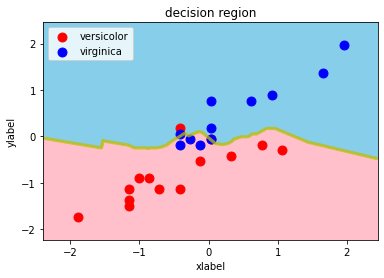

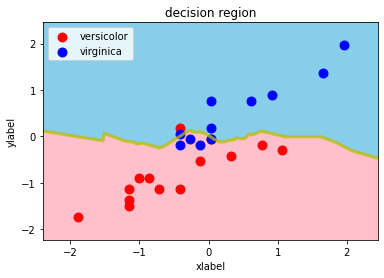

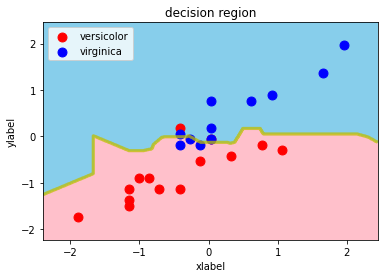

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models=[k_neigh_3,k_neigh_5,k_neigh_1]
for a,model in enumerate(models,1):
    decision_region(x_test_trans,y_test,model)

In [ ]:
def display_outputs(title,pred,model,std):
    print (title)
    print("pred =",pred)
    print("accuracy = ",accuracy_score(y_true=y_test,y_pred=prediction))
    print("precision = ",precision_score(y_true=y_test,y_pred=prediction,average=None))
    print("recall = ", recall_score(y_true=y_test,y_pred=prediction, average=None))
    print("f1 score =",f1_score(y_true=y_test,y_pred=prediction,average=None))
    print("confusion matrix = ",confusion_matrix(y_true=y_test,y_pred=prediction))
    if (std==True):
       decision_region(x_test_trans,y_test,model)
    else:
         decision_region(x_test,y_test,model)
    print(".......................................")

Logical Regression
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


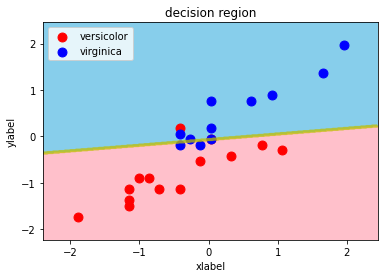

.......................................


In [ ]:
from sklearn.linear_model import LogisticRegression
lR_fit=LogisticRegression(random_state=0).fit(x_train_trans,y_train)
lR_predict=lR_fit.predict(x_test_trans)
display_outputs('Logical Regression', lR_predict,lR_fit,std=True)

SVM
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


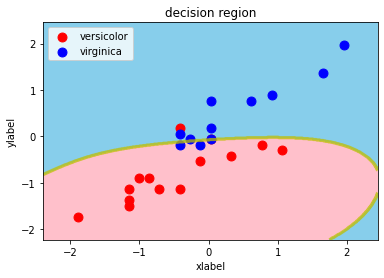

.......................................


In [ ]:
from numpy.core.fromnumeric import std
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf=make_pipeline(StandardScaler(),SVC(gamma='auto'))
clf.fit(x_train_trans,y_train)
clf_pred=clf.predict(x_test_trans)
display_outputs('SVM',clf_pred,clf, std=True)

Decision tree
pred = [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


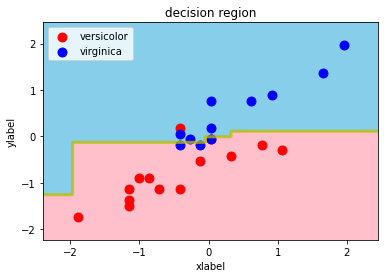

.......................................


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTC= DecisionTreeClassifier(random_state=0)
dTC.fit(x_train_trans,y_train)
dTC_pred=dTC.predict(x_test_trans)
display_outputs('Decision tree',dTC_pred,dTC,std=True)


Random Forest
pred = [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


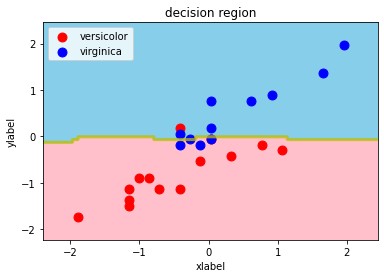

.......................................


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rFC=RandomForestClassifier(max_depth=2,random_state=0)
rFC.fit(x_train_trans,y_train)
rFC_pred=rFC.predict(x_test_trans)
display_outputs('Random Forest',rFC_pred,rFC,std=True)

knn
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


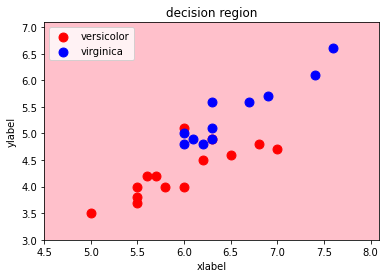

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


.......................................
Logical Regression
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


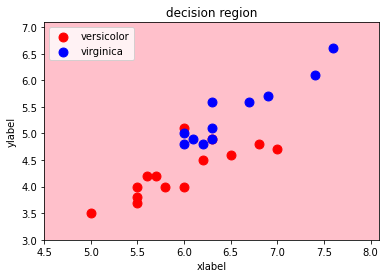

.......................................
SVM
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


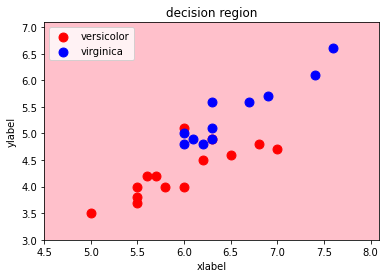

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


.......................................
Decision tree
pred = [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


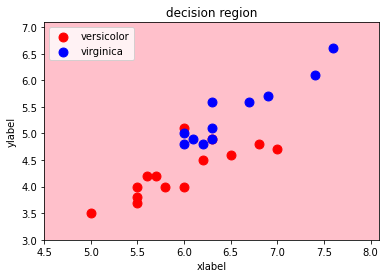

.......................................
Random Forest
pred = [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


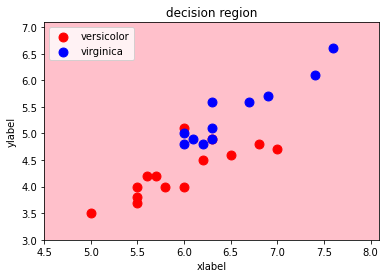

.......................................


In [ ]:
k_neigh_3_2=KNeighborsClassifier(n_neighbors=3)
k_neigh_3_2.fit(x_train_trans,y_train.ravel())
pred_3_2=k_neigh_3_2.predict(x_test_trans)
display_outputs('knn',pred_3_2,k_neigh_3_2,std=False)

from sklearn.linear_model import LogisticRegression
lR_fit=LogisticRegression(random_state=0).fit(x_train_trans,y_train)
lR_predict=lR_fit.predict(x_test_trans)
display_outputs('Logical Regression', lR_predict,lR_fit,std=False)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf=make_pipeline(StandardScaler(),SVC(gamma='auto'))
clf.fit(x_train_trans,y_train)
clf_pred=clf.predict(x_test_trans)
display_outputs('SVM',clf_pred,clf, std=False)

from sklearn.tree import DecisionTreeClassifier
dTC= DecisionTreeClassifier(random_state=0)
dTC.fit(x_train_trans,y_train)
dTC_pred=dTC.predict(x_test_trans)
display_outputs('Decision tree',dTC_pred,dTC,std=False)

from sklearn.ensemble import RandomForestClassifier
rFC=RandomForestClassifier(max_depth=2,random_state=0)
rFC.fit(x_train_trans,y_train)
rFC_pred=rFC.predict(x_test_trans)
display_outputs('Random Forest',rFC_pred,rFC,std=False)

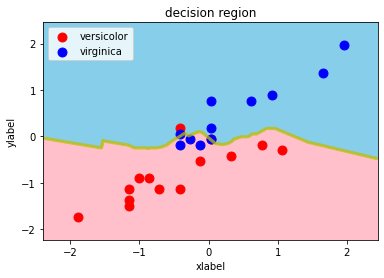

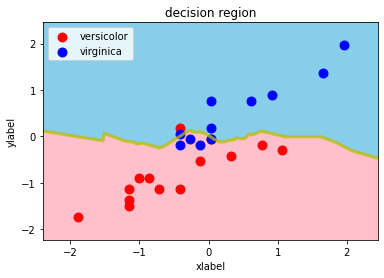

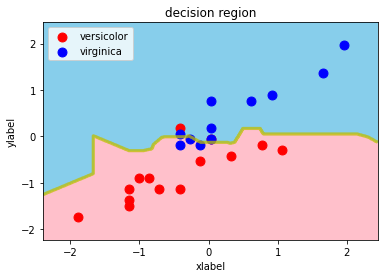

knn
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


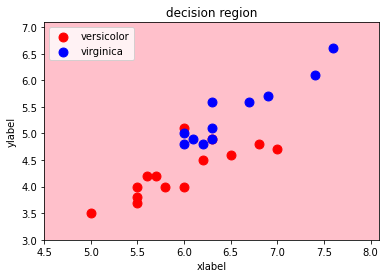

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


.......................................
Logical Regression
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


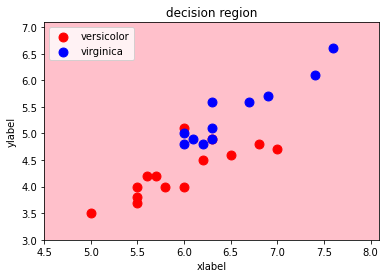

.......................................
SVM
pred = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


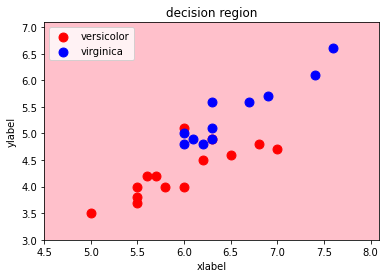

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


.......................................
Decision tree
pred = [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


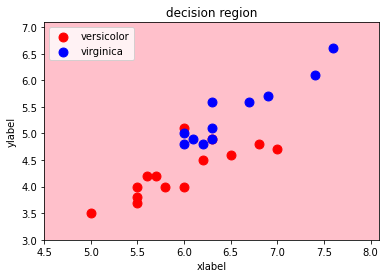

.......................................
Random Forest
pred = [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


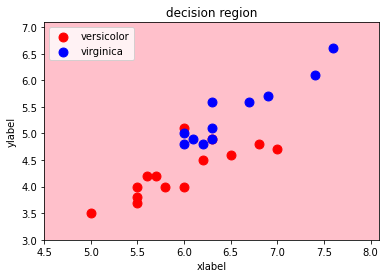

.......................................


In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region_2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models=[k_neigh_3,k_neigh_5,k_neigh_1]
for a,model in enumerate(models,1):
    decision_region(x_test_trans,y_test,model)

def display_outputs_2(title,pred,model,std):
    print (title)
    print("pred =",pred)
    print("accuracy = ",accuracy_score(y_true=y_test,y_pred=prediction))
    print("precision = ",precision_score(y_true=y_test,y_pred=prediction,average=None))
    print("recall = ", recall_score(y_true=y_test,y_pred=prediction, average=None))
    print("f1 score =",f1_score(y_true=y_test,y_pred=prediction,average=None))
    print("confusion matrix = ",confusion_matrix(y_true=y_test,y_pred=prediction))
    if (std==True):
       decision_region(x_test_trans,y_test,model)
    else:
         decision_region(x_test,y_test,model)
    print(".......................................")
    x2=df.iloc[:,-1].values
    y2=df.iloc[:,-1].values
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.25,random_state=42)

k_neigh_3_2=KNeighborsClassifier(n_neighbors=3)
k_neigh_3_2.fit(x_train_trans,y_train.ravel())
pred_3_2=k_neigh_3_2.predict(x_test_trans)
display_outputs('knn',pred_3_2,k_neigh_3_2,std=False)

from sklearn.linear_model import LogisticRegression
lR_fit=LogisticRegression(random_state=0).fit(x_train_trans,y_train)
lR_predict=lR_fit.predict(x_test_trans)
display_outputs('Logical Regression', lR_predict,lR_fit,std=False)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf=make_pipeline(StandardScaler(),SVC(gamma='auto'))
clf.fit(x_train_trans,y_train)
clf_pred=clf.predict(x_test_trans)
display_outputs('SVM',clf_pred,clf, std=False)

from sklearn.tree import DecisionTreeClassifier
dTC= DecisionTreeClassifier(random_state=0)
dTC.fit(x_train_trans,y_train)
dTC_pred=dTC.predict(x_test_trans)
display_outputs('Decision tree',dTC_pred,dTC,std=False)

from sklearn.ensemble import RandomForestClassifier
rFC=RandomForestClassifier(max_depth=2,random_state=0)
rFC.fit(x_train_trans,y_train)
rFC_pred=rFC.predict(x_test_trans)
display_outputs('Random Forest',rFC_pred,rFC,std=False)